In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\asus\Downloads\archive\insurance.csv')

In [3]:
data = pd.DataFrame(data)
data

age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]

<AxesSubplot:xlabel='region', ylabel='expenses'>

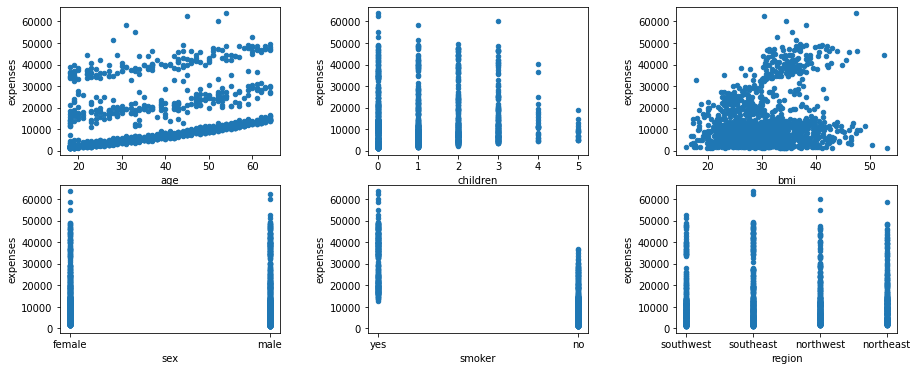

In [4]:
#plots one variable variation
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
data.plot(kind='scatter', x='age', y='expenses', ax=axes[0][0])
data.plot(kind='scatter', x='children', y='expenses', ax=axes[0][1])
data.plot(kind='scatter', x='bmi', y='expenses', ax=axes[0][2])
data.plot(kind='scatter', x='sex', y='expenses', ax=axes[1][0])
data.plot(kind='scatter', x='smoker', y='expenses', ax=axes[1][1])
data.plot(kind='scatter', x='region', y='expenses', ax=axes[1][2])

<AxesSubplot:ylabel='Frequency'>

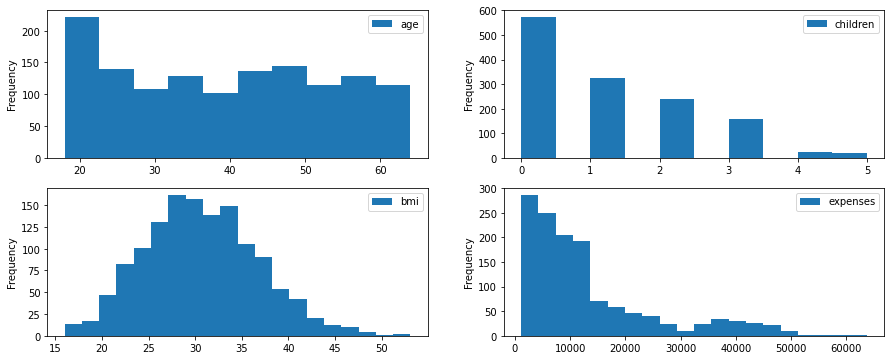

In [5]:
#EDA for categorical vaiables
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,6))
data.plot(kind='hist', y='age', ax=axes[0][0],bins=10)
data.plot(kind='hist', y='children', ax=axes[0][1])
data.plot(kind='hist', y='bmi', ax=axes[1][0], bins=20)
data.plot(kind='hist', y='expenses', ax=axes[1][1],bins=20)


<AxesSubplot:xlabel='age', ylabel='expenses'>

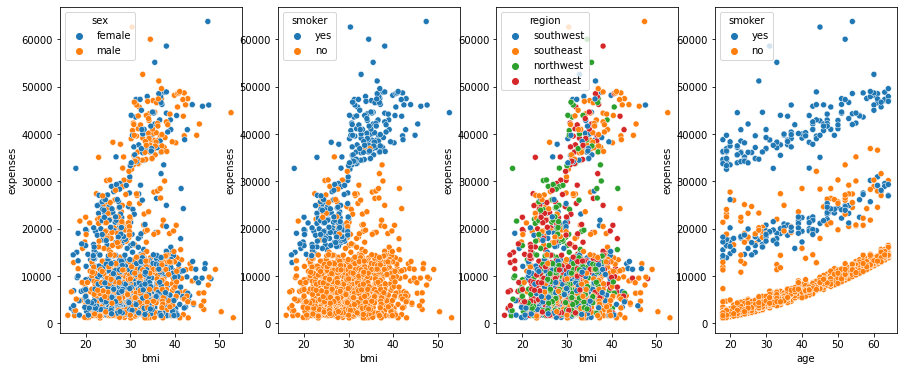

In [6]:
fig, axes = plt.subplots(ncols = 4, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=data,hue='sex')
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=data,hue='smoker')
sns.scatterplot(x='bmi', y='expenses', ax=axes[2], data=data,hue='region')
sns.scatterplot(x='age', y='expenses', ax=axes[3], data=data,hue='smoker')

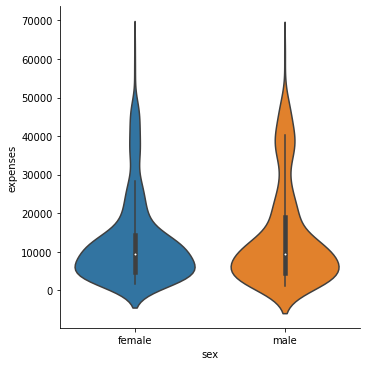

In [7]:
sns.catplot(data=data, x='sex', y='expenses',kind='violin')

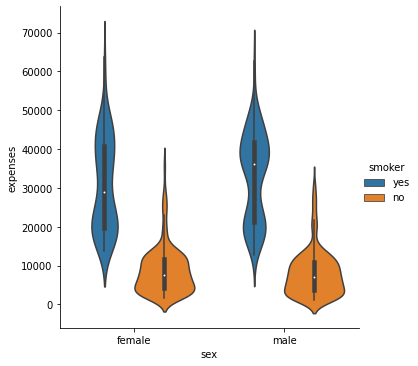

In [8]:
sns.catplot(data=data, x='sex', y='expenses', hue = 'smoker',kind='violin')

Conclusion till now

1. most of the Female smoker has lower charges
2. more men have higher expenses than women
3. region has no meaning in charges
4. smokers generally pay more


In [12]:
matrix = data.corr()
matrix

age       bmi  children  expenses
age       1.000000  0.109341  0.042469  0.299008
bmi       0.109341  1.000000  0.012645  0.198576
children  0.042469  0.012645  1.000000  0.067998
expenses  0.299008  0.198576  0.067998  1.000000

In [13]:
data['sex'] = data['sex'].map(lambda k:1 if k == "female" else 0)
data['smoker'] = data['smoker'].map(lambda k:1 if k == "yes" else 0)

In [14]:
data

age  sex   bmi  children  smoker     region  expenses
0      19    1  27.9         0       1  southwest  16884.92
1      18    0  33.8         1       0  southeast   1725.55
2      28    0  33.0         3       0  southeast   4449.46
3      33    0  22.7         0       0  northwest  21984.47
4      32    0  28.9         0       0  northwest   3866.86
...   ...  ...   ...       ...     ...        ...       ...
1333   50    0  31.0         3       0  northwest  10600.55
1334   18    1  31.9         0       0  northeast   2205.98
1335   18    1  36.9         0       0  southeast   1629.83
1336   21    1  25.8         0       0  southwest   2007.95
1337   61    1  29.1         0       1  northwest  29141.36

[1338 rows x 7 columns]

In [15]:
data = data.drop(['region'], axis=1)

In [16]:
data

age  sex   bmi  children  smoker  expenses
0      19    1  27.9         0       1  16884.92
1      18    0  33.8         1       0   1725.55
2      28    0  33.0         3       0   4449.46
3      33    0  22.7         0       0  21984.47
4      32    0  28.9         0       0   3866.86
...   ...  ...   ...       ...     ...       ...
1333   50    0  31.0         3       0  10600.55
1334   18    1  31.9         0       0   2205.98
1335   18    1  36.9         0       0   1629.83
1336   21    1  25.8         0       0   2007.95
1337   61    1  29.1         0       1  29141.36

[1338 rows x 6 columns]

In [17]:
X = data.iloc[:,:5]
Y = data.iloc[:,-1]

In [18]:
Y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

In [20]:
X_train.head()

age  sex   bmi  children  smoker
1306   29    1  21.9         0       1
717    60    0  24.3         1       0
47     28    1  34.8         0       0
890    64    1  26.9         0       1
778    35    0  34.3         3       0

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
reg = lr_model.fit(X_train,y_train)
reg.score(X_train,y_train)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict

model = LinearRegression()
reg=model.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
regression_train_score = r2_score(y_train_pred, y_train)
regression_train_score

0.6596095380922586

In [22]:
Y_pred = reg.predict(X_test)

regression_test_score = r2_score(y_test, Y_pred)
regression_test_score

0.7507166846791657

In [23]:
regression_y_pred_cv = cross_val_predict(reg, X_train, y_train, cv=20)
CV_score_reg = r2_score(y_train, regression_y_pred_cv)
CV_score_reg

0.7419071979954084

In [24]:
linear_comparison = pd.DataFrame({"actual expense" : y_test, "Predicted" : Y_pred})
linear_comparison

actual expense     Predicted
1162        18963.17   8458.230521
1191        13725.47   5929.424418
134          2457.21   2542.806312
722         12979.36  15147.754673
1250        18648.42  27248.732397
...              ...           ...
796          4266.17  10625.245277
0           16884.92  25518.395960
111         11881.36  12200.417891
18          10602.39  14602.802621
42           6272.48   5886.213646

[402 rows x 2 columns]

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

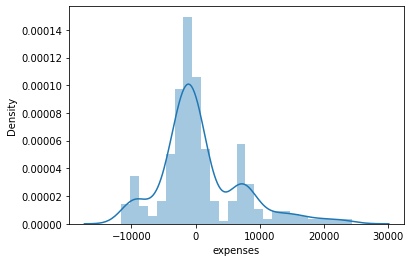

In [25]:
sns.distplot(y_test-Y_pred)

In [26]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## KNN Regression

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsRegressor()
params = {'n_neighbors':[1,2,5,9,10,12,15,20],'weights':['uniform','distance'], 'metric':['euclidean']}
reg = GridSearchCV(neigh, params, cv=20, n_jobs=-1)

results = reg.fit(X_train, y_train)

In [28]:
results.best_params_

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}

In [29]:
results.best_score_

0.8252825813528372

In [30]:
neigh = KNeighborsRegressor(n_neighbors=10,metric='euclidean',weights='uniform')
reg = neigh.fit(X_train, y_train)

knn_train_pred = neigh.predict(X_train)
knn_test_pred = neigh.predict(X_test)

knn_train_score = r2_score(y_train, knn_train_pred)
print("training score :",knn_train_score)
knn_test_pred = r2_score(y_test, knn_test_pred)
print("testing_score :",knn_test_pred)

knn_y_pred_cv = cross_val_predict(reg, X_train, y_train, cv=20)
CV_score_knn = r2_score(y_train, knn_y_pred_cv)
print(CV_score_knn)

training score : 0.8608293184365188
testing_score : 0.8134065263139192
0.8292628010292553


In [32]:
knn_comparison = pd.DataFrame({"actual expense" :y_test , "Predicted" : knn_test_pred})
print(reg.score(X_test, y_test))
knn_comparison

0.8134065263139192


actual expense  Predicted
1162        18963.17   0.813407
1191        13725.47   0.813407
134          2457.21   0.813407
722         12979.36   0.813407
1250        18648.42   0.813407
...              ...        ...
796          4266.17   0.813407
0           16884.92   0.813407
111         11881.36   0.813407
18          10602.39   0.813407
42           6272.48   0.813407

[402 rows x 2 columns]

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

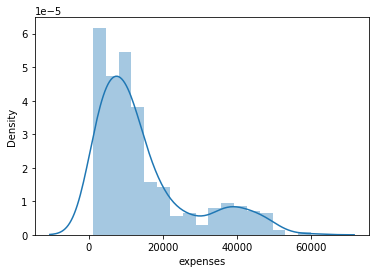

In [34]:
sns.distplot(y_test-knn_test_pred)

## Linear Regression with polynomial features

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict

degrees = [1,2,3,4,5]
for i in degrees :
    new_features = PolynomialFeatures(degree = i)
    x_train_poly = new_features.fit_transform(X_train)
    
    x_test_poly = new_features.fit_transform(X_test)
    
    reg = LinearRegression()
    reg.fit(x_train_poly,y_train)
    print("test", i)

    y_pred_train = reg.predict(x_train_poly)
    y_pred_test = reg.predict(x_test_poly)
    accuracy_train = r2_score(y_train,y_pred_train)
    accuracy_test = r2_score(y_test,y_pred_test)
    y_pred_cv = cross_val_predict(reg, new_features.fit_transform(X_train), y_train, cv=20)
    acc = r2_score(y_train, y_pred_cv)
    print("Training accuracy :",accuracy_train,", testing_accuracy :", accuracy_test,", CV accuracy :", acc,"\n")


test 1
Training accuracy : 0.7460512652236627 , testing_accuracy : 0.7507166846791657 , CV accuracy : 0.7419071979954083 

test 2
Training accuracy : 0.8519470611105463 , testing_accuracy : 0.8234599318751735 , CV accuracy : 0.8453604976873205 

test 3
Training accuracy : 0.8581983332129861 , testing_accuracy : 0.8233297602791235 , CV accuracy : 0.8405711244513274 

test 4
Training accuracy : 0.8656623245403372 , testing_accuracy : 0.8183445157610318 , CV accuracy : 0.8072834434389027 

test 5
Training accuracy : 0.8818271544686255 , testing_accuracy : 0.7942680096364976 , CV accuracy : 0.6426944100683532 



In [36]:
new_features = PolynomialFeatures(degree = 3)
x_train_poly = new_features.fit_transform(X_train)
x_test_poly = new_features.fit_transform(X_test)

reg = LinearRegression()
reg.fit(x_train_poly,y_train)

y_pred_train = reg.predict(x_train_poly)
accuracy_train_PF = r2_score(y_train,y_pred_train)

y_pred_test = reg.predict(x_test_poly)
accuracy_test_PF = r2_score(y_test,y_pred_test)

y_pred_cv = cross_val_predict(reg, new_features.fit_transform(X_train), y_train, cv=20)
PF_CV_score = r2_score(y_train, y_pred_cv)


print("CV test accuracy :", PF_CV_score)

CV test accuracy : 0.8405711244513274


In [37]:
LR_comparison = pd.DataFrame({"actual expense" :y_test , "Predicted" : y_pred_test})
LR_comparison

actual expense     Predicted
1162        18963.17   5465.765625
1191        13725.47   7399.015625
134          2457.21   2869.765625
722         12979.36  13465.015625
1250        18648.42  27240.265625
...              ...           ...
796          4266.17   4744.015625
0           16884.92  23706.265625
111         11881.36  13401.265625
18          10602.39  11760.140625
42           6272.48   7430.453125

[402 rows x 2 columns]

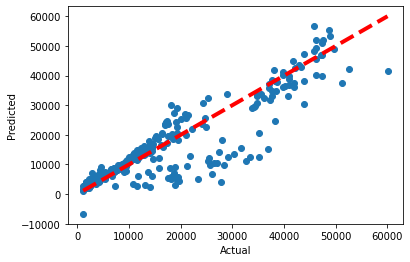

In [38]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color="red")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

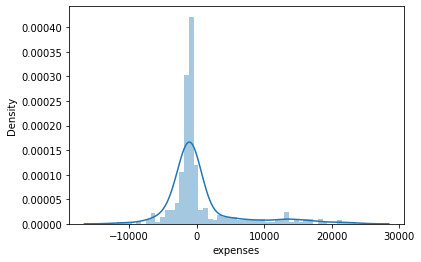

In [39]:
sns.distplot(y_test-y_pred_test)

## Regression Trees

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5],
           "min_samples_leaf":[2,3,4,5,6,7],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,0.25,0.5,0.7] }
decision_tree_reg = DecisionTreeRegressor()  

model=GridSearchCV(decision_tree_reg,param_grid=parameters,scoring='neg_mean_squared_error',cv=10,verbose=3)
results = model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV 1/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, s

[CV 1/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 9/10] END ma

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 5/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/10] END max_d

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 1/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 5/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=1, max_feat

[CV 10/10] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=1, ma

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 5/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=1, max_feat

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l


[CV 6/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=1, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=1, max_f

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l


[CV 6/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 6/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 4/10] END max_dep

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 9/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=1, max_feat

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 3/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=1, max_features

[CV 5/10] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=1, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/10] END max_d

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 4/10] END max_depth=1, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=1, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=1, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=1, max_featur

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 4/10] END max_depth=1, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=1, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=1, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=1, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=1, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=1, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=1, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=1, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=1

[CV 5/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=3, 

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 3/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/10] END m

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 5/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=3, 

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 8/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=3, m

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 7/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 5/10] END max_depth

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 6/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=3, ma

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 2/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=3, max_features

[CV 1/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 9/10] END ma

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\


[CV 4/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=3, m

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 6/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=3, max_fe

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 10/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=3

[CV 5/10] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/10] END max_d

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 8/10] END max_depth=3, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=3, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=3, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=3, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=3, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=3, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=3, max

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 3/10] END max_depth=3, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=3, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=3, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=3, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=3, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=3, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=3, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=3, max_features=None, max_leaf_nodes=0.7, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=3, max_features

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 4/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/10] END max

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 5/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=5, 

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 3/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/10] END max_depth

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 3/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=auto, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/10] END max_depth

[CV 7/10] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 5/10] END max_depth

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 5/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.25, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/10] END max_d

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 9/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=log2, max_leaf_nodes=0.7, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=5, max_feat

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 7/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 8/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 9/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 5/10] END max_depth

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 1/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.25, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=5, max_f

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 6/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.5, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=5, max_fe

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 9/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=sqrt, max_leaf_nodes=0.7, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 7/10] END max_depth=5, 

[CV 9/10] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/10] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/10] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/10] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/10] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 5/10] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 7/10] END max_d

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.25

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\

[CV 9/10] END max_depth=5, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 10/10] END max_depth=5, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/10] END max_depth=5, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/10] END max_depth=5, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=5, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=5, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=5, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=None, max_leaf_nodes=0.25, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=5, 

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.5

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

[CV 2/10] END max_depth=5, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/10] END max_depth=5, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/10] END max_depth=5, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/10] END max_depth=5, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 6/10] END max_depth=5, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 7/10] END max_depth=5, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 8/10] END max_depth=5, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 9/10] END max_depth=5, max_features=None, max_leaf_nodes=0.5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 10/10] END max_depth=5, max_features

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 290, in fit
    raise ValueError("max_leaf_nodes must be integral number but was "
ValueError: max_leaf_nodes must be integral number but was 0.7

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\asus\appdata\local\programs\python\python38\l

In [41]:
results.best_params_

{'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [42]:
reg = DecisionTreeRegressor(max_depth= 3,
 max_features= 'auto',
 max_leaf_nodes= None,
 min_samples_leaf= 2,
 splitter= 'best')

In [43]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11]
scores = []
for i in max_depth :
    decision_tree_reg = DecisionTreeRegressor(max_depth= i,max_features='auto',max_leaf_nodes= None,min_samples_leaf= 2,
                                              splitter= 'best')  
    res = decision_tree_reg.fit(X_train, y_train)
    ans = res.predict(X_train)
    score = r2_score(ans,y_train)
    scores.append(score)

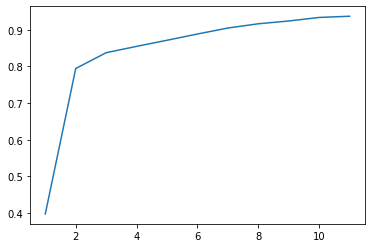

In [44]:
plt.plot(max_depth, scores)

In [45]:
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

tree_train_score = r2_score(y_train,y_train_pred)
tree_test_score = r2_score(y_test,y_test_pred)

print("training score :",tree_train_score) 
print("testing score :",tree_test_score)

y_pred_cv = cross_val_predict(reg, X_train, y_train, cv=20)
tree_CV_train = r2_score(y_train, y_pred_cv)
print("CV testing score :",tree_CV_train)

training score : 0.8602888607231551
testing score : 0.8402789206157516
CV testing score : 0.8465872350402621


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

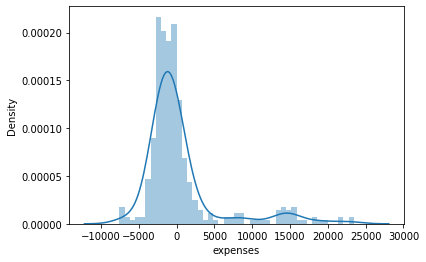

In [46]:
sns.distplot(y_test-y_test_pred)

[Text(279.0, 475.65000000000003, 'X[4] <= 0.759\nmse = 137939420.372\nsamples = 936\nvalue = 12761.832'),
 Text(139.5, 339.75, 'X[0] <= 0.253\nmse = 32857492.564\nsamples = 751\nvalue = 8156.707'),
 Text(69.75, 203.85000000000002, 'X[0] <= -0.46\nmse = 21387746.095\nsamples = 429\nvalue = 5284.111'),
 Text(34.875, 67.94999999999999, 'mse = 20972715.966\nsamples = 282\nvalue = 4292.68'),
 Text(104.625, 67.94999999999999, 'mse = 16680958.526\nsamples = 147\nvalue = 7186.04'),
 Text(209.25, 203.85000000000002, 'X[0] <= 0.894\nmse = 22497637.479\nsamples = 322\nvalue = 11983.861'),
 Text(174.375, 67.94999999999999, 'mse = 18812292.907\nsamples = 140\nvalue = 9931.625'),
 Text(244.125, 67.94999999999999, 'mse = 19600654.587\nsamples = 182\nvalue = 13562.504'),
 Text(418.5, 339.75, 'X[2] <= -0.066\nmse = 128948070.478\nsamples = 185\nvalue = 31456.149'),
 Text(348.75, 203.85000000000002, 'X[0] <= 0.146\nmse = 25149146.808\nsamples = 94\nvalue = 21682.391'),
 Text(313.875, 67.94999999999999, 

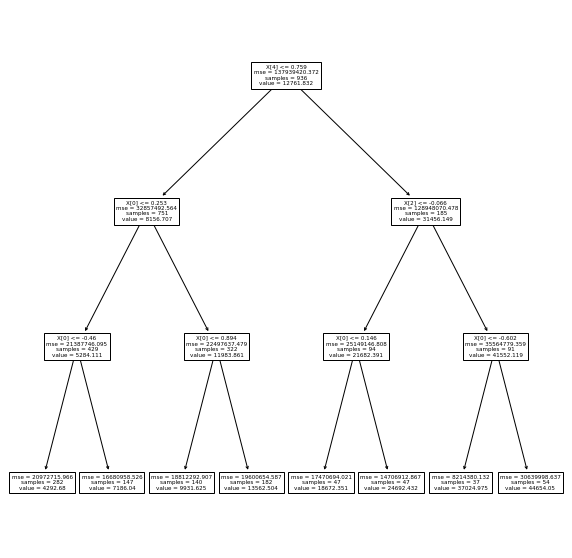

In [47]:
import sklearn
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
sklearn.tree.plot_tree(reg)

## Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor  

depths = [1,2,3,4,5,6,7,8,9,10]
scores = []

for j in depths :
    random_forest = RandomForestRegressor(n_estimators=200, max_depth=j, random_state=13)  
    reg = random_forest.fit(X_train, y_train)
    prediction_train = reg.predict(X_train)
    score = r2_score(prediction_train, y_train)
    scores.append(score)
        

    

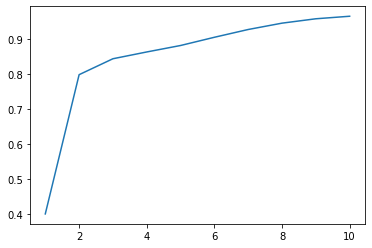

In [49]:
plt.plot(depths,scores)

In [50]:
estimator = [100,200,300,400,500,600,700,800,900,1000]
scores = []

for j in estimator :
    random_forest = RandomForestRegressor(n_estimators=j, max_depth=3, random_state=13)  
    reg = random_forest.fit(X_train, y_train)
    prediction_train = reg.predict(X_train)
    score = r2_score(prediction_train, y_train)
    scores.append(score)

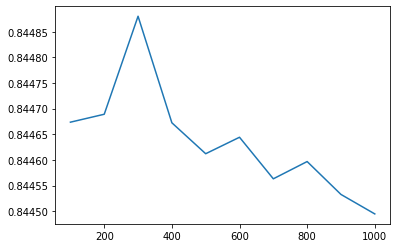

In [51]:
plt.plot(estimator,scores)

In [53]:
random_forest = RandomForestRegressor(n_estimators=300, max_depth=3, random_state=13)  
reg = random_forest.fit(X_train, y_train)
prediction_train = reg.predict(X_train)
y_pred = reg.predict(X_test)
RF_score_train = r2_score(prediction_train, y_train)
RF_test_score = r2_score(y_test, y_pred)

y_pred_cv = cross_val_predict(reg, X_train, y_train, cv=20)
CV_RF = r2_score(y_train, y_pred_cv)

print("Training Score :",RF_score_train)
print("Testing Score :",RF_test_score)
print("CV_training_score :", CV_RF)

Training Score : 0.8448800560458718
Testing Score : 0.8482952886491307
CV_training_score : 0.8567252780907704


In [54]:
Linear_Regression = [regression_train_score*100, CV_score_reg*100, regression_test_score*100]
Knn_Regression = [knn_train_score*100, CV_score_knn*100, knn_test_pred*100]
LR_polynomial = [accuracy_train_PF*100, PF_CV_score*100, accuracy_test_PF*100]
Regression_trees = [tree_train_score*100, tree_CV_train*100, tree_test_score*100]
Random_Forest = [RF_score_train*100, CV_RF*100, RF_test_score*100]

In [55]:
scores = {"Accuracy" : ["Training Accuracy (%)", "Cross-Validation Training Accuracy (%)", "Testing Accuracy (%)"],
          "Linear_Regression" : Linear_Regression,
         "Knn_Regression" : Knn_Regression,
         "LR_polynomial":LR_polynomial,
         "Regression_trees":Regression_trees,
         "Random_Forest" : Random_Forest}

In [56]:
df = pd.DataFrame(scores)


In [57]:
df.set_index('Accuracy')

Linear_Regression  Knn_Regression  \
Accuracy                                                                    
Training Accuracy (%)                           65.960954       86.082932   
Cross-Validation Training Accuracy (%)          74.190720       82.926280   
Testing Accuracy (%)                            75.071668       81.340653   

                                        LR_polynomial  Regression_trees  \
Accuracy                                                                  
Training Accuracy (%)                       85.819833         86.028886   
Cross-Validation Training Accuracy (%)      84.057112         84.658724   
Testing Accuracy (%)                        82.332976         84.027892   

                                        Random_Forest  
Accuracy                                               
Training Accuracy (%)                       84.488006  
Cross-Validation Training Accuracy (%)      85.672528  
Testing Accuracy (%)                        84.829529